In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
import cv2 as cv
import typing as t
import pathlib as pb
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [79]:
import domino.data
import domino.vision

In [80]:
# Predefined expected paths
ROOT_PATH = pb.Path('..')
DATA_PATH  = ROOT_PATH / 'data'
HELP_PATH  = DATA_PATH / 'help'
TEST_PATH  = DATA_PATH / 'test'
TRAIN_PATH = DATA_PATH / 'train'
VALID_PATH = DATA_PATH / 'valid'

# Obtain deterministic results
SEED = 42
rnd.seed(SEED)
np.random.seed(SEED)

In [81]:
train_dataset = domino.data.DDDGameDataset(TRAIN_PATH, train=True)
valid_dataset = domino.data.DDDGameDataset(VALID_PATH, train=True)
test_dataset  = domino.data.DDDGameDataset(TEST_PATH, train=False)

In [128]:
op_perspective = domino.vision.PerspectiveOperation(show_image=True)
op_preprocess  = domino.vision.PreProcessOperation(scale=0.35)
op_display     = domino.vision.DisplayOperation(scale=1.0)

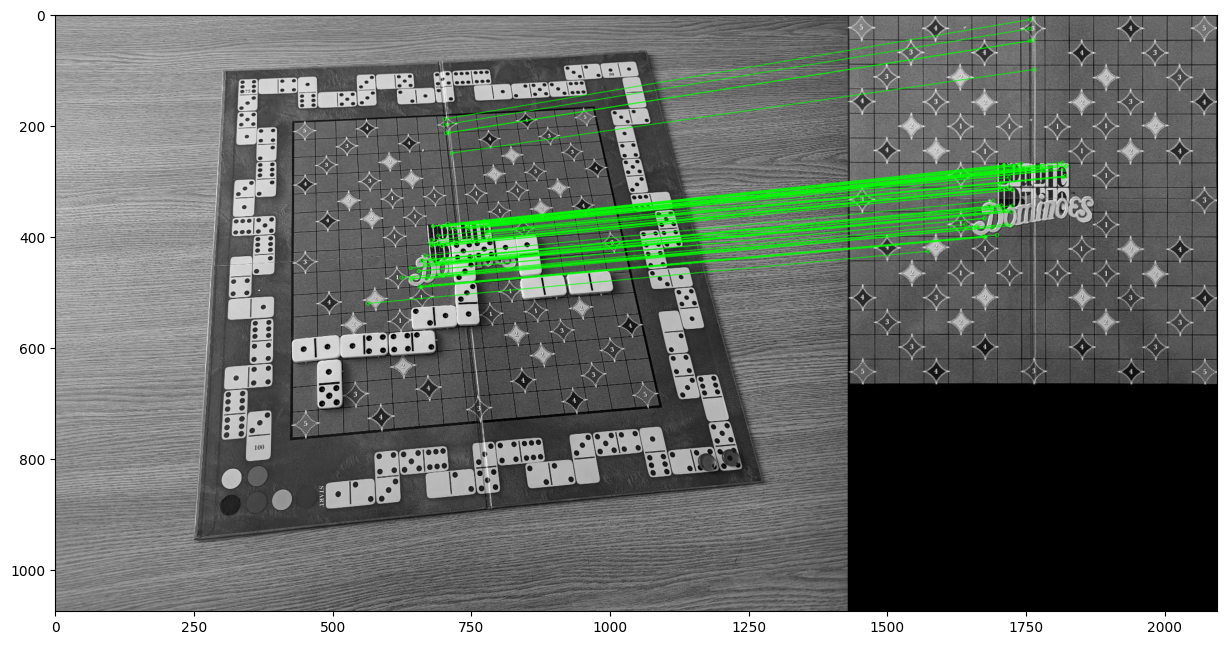

In [279]:
# Choose a template and a random image
template_image: np.ndarray = train_dataset.dataset_help.template(1, dynamic_retrieval=True, scale=0.35)
target_image: np.ndarray = train_dataset.dataset_regular[3, 10][0][0]

# Preprocess the images
target_image = (op_preprocess(target_image) * 255.).astype(np.uint8)

# Apply perspective operation
warped: np.ndarray = op_perspective(target_image, template_image)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

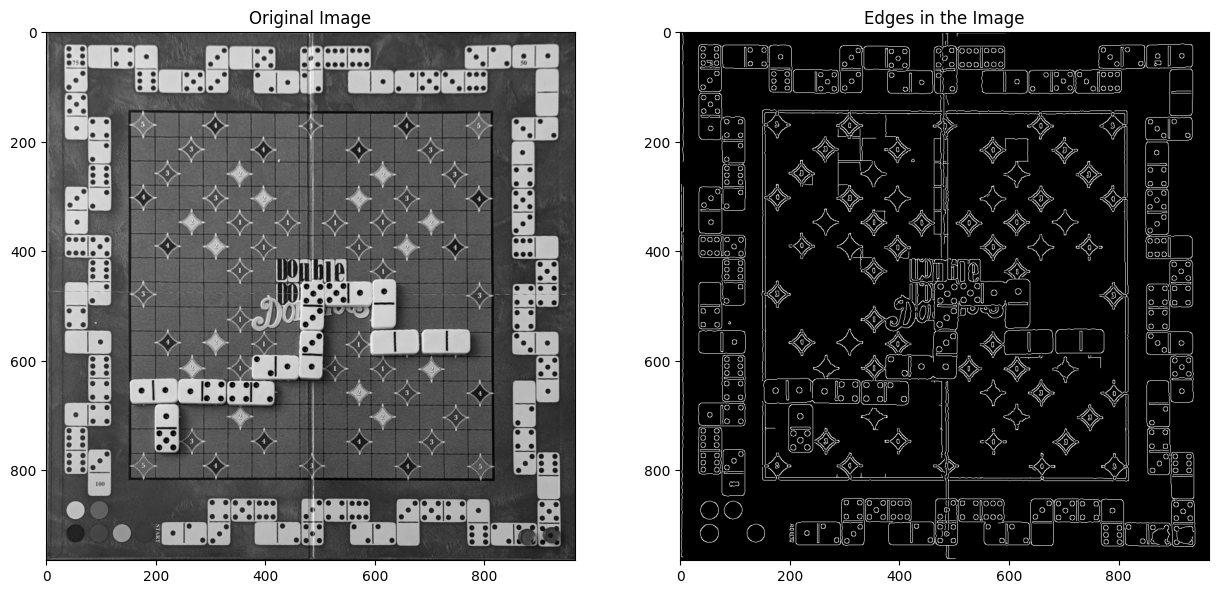

In [277]:
warped_copy: np.ndarray = warped.copy()
op_img2grid = domino.vision.Image2GridOperation(show_image=True)
op_img2grid(warped_copy)